In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../week_01/all_penguins_clean.csv', index_col=0)

In [3]:
df.shape

(344, 14)

In [6]:
species = df['Species']

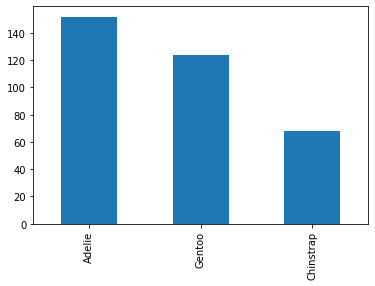

In [9]:
species.value_counts().plot.bar()

### Sampling Bias

*"the distribution of classes in the sample is different from the original population by coincidence"*

**Solution 1: Balance Classes**
    
**Solution 2: Stratification – enforce proportions of classes**

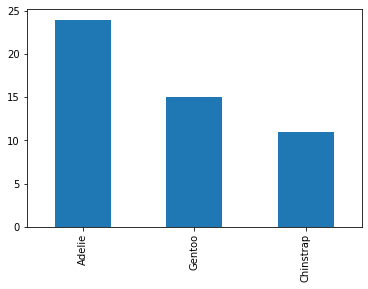

In [23]:
species.sample(50).value_counts().plot.bar()

## Cross-Validation

In [38]:
df.dropna(inplace=True)
df['mass'] = df['Body Mass (g)'] / 100.0  # !!! better do a Min-Max Scaling

In [39]:
X = df[['Culmen Length (mm)', 'mass']]

In [40]:
y = df['Species']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [42]:
m = LogisticRegression()

In [49]:
cross_val_score(m, X, y, cv=5, scoring='accuracy').round(3)

array([0.925, 0.955, 0.94 , 0.955, 0.97 ])

In [50]:
from sklearn.utils import resample

In [53]:
resample(list('ABCDEFGHIJ'))

['J', 'H', 'C', 'E', 'A', 'A', 'A', 'A', 'F', 'H']

In [51]:
m = LogisticRegression()

boots = []
for i in range(1000):
    Xb, yb = resample(X, y)
    m.fit(Xb, yb)
    score = m.score(Xb, yb)
    boots.append(score)
    print(i, score)

0 0.9461077844311377


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1 0.9790419161676647
2 0.9580838323353293
3 0.9491017964071856
4 0.9610778443113772
5 0.9491017964071856
6 0.9401197604790419
7 0.9161676646706587
8 0.937125748502994
9 0.9520958083832335
10 0.9760479041916168
11 0.9431137724550899


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


12 0.9790419161676647
13 0.9700598802395209
14 0.9520958083832335


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


15 0.9580838323353293
16 0.9401197604790419
17 0.9700598802395209
18 0.9730538922155688
19 0.9401197604790419
20 0.9580838323353293
21 0.9640718562874252
22 0.9790419161676647
23 0.9580838323353293
24 0.9520958083832335
25 0.9580838323353293
26 0.9491017964071856
27 0.9550898203592815
28 0.9730538922155688
29 0.9461077844311377
30 0.9550898203592815
31 0.9760479041916168
32 0.937125748502994
33 0.9550898203592815
34 0.937125748502994
35 0.9610778443113772
36 0.9520958083832335
37 0.9790419161676647
38 0.9640718562874252
39 0.9461077844311377
40 0.9520958083832335
41 0.9520958083832335
42 0.9431137724550899
43 0.9670658682634731
44 0.9640718562874252
45 0.9431137724550899
46 0.9431137724550899
47 0.9281437125748503
48 0.9431137724550899
49 0.9730538922155688
50 0.9640718562874252
51 0.937125748502994
52 0.9670658682634731
53 0.9401197604790419
54 0.9461077844311377
55 0.9580838323353293
56 0.9730538922155688
57 0.9700598802395209


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


58 0.9550898203592815
59 0.9491017964071856
60 0.9610778443113772
61 0.9700598802395209
62 0.937125748502994
63 0.9491017964071856
64 0.9640718562874252
65 0.9610778443113772
66 0.9431137724550899
67 0.9700598802395209
68 0.9640718562874252
69 0.9431137724550899
70 0.9431137724550899
71 0.9550898203592815
72 0.9670658682634731
73 0.9610778443113772
74 0.9670658682634731
75 0.9520958083832335
76 0.9431137724550899
77 0.9730538922155688
78 0.9670658682634731
79 0.9461077844311377
80 0.9491017964071856
81 0.9580838323353293
82 0.9640718562874252


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


83 0.9610778443113772
84 0.9610778443113772
85 0.9730538922155688
86 0.9341317365269461
87 0.9760479041916168
88 0.9401197604790419
89 0.9550898203592815
90 0.9431137724550899
91 0.9550898203592815
92 0.9431137724550899
93 0.9550898203592815
94 0.9610778443113772
95 0.9520958083832335
96 0.9431137724550899
97 0.9610778443113772
98 0.9491017964071856
99 0.9700598802395209
100 0.937125748502994
101 0.937125748502994
102 0.9670658682634731
103 0.9401197604790419
104 0.9790419161676647
105 0.9431137724550899
106 0.9730538922155688
107 0.9550898203592815
108 0.9580838323353293
109 0.9520958083832335
110 0.9610778443113772
111 0.9730538922155688
112 0.9520958083832335
113 0.9431137724550899
114 0.9730538922155688
115 0.9730538922155688


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


116 0.9431137724550899
117 0.9461077844311377
118 0.9670658682634731
119 0.9550898203592815
120 0.9341317365269461
121 0.9610778443113772
122 0.9461077844311377
123 0.9640718562874252
124 0.9730538922155688
125 0.9670658682634731
126 0.9820359281437125


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


127 0.9341317365269461
128 0.9670658682634731
129 0.9640718562874252
130 0.9550898203592815
131 0.9640718562874252
132 0.9640718562874252
133 0.9700598802395209
134 0.9580838323353293
135 0.9580838323353293
136 0.9550898203592815
137 0.9520958083832335
138 0.9401197604790419
139 0.9491017964071856
140 0.9580838323353293
141 0.9730538922155688
142 0.9640718562874252
143 0.9730538922155688
144 0.9700598802395209
145 0.9221556886227545
146 0.9610778443113772
147 0.9610778443113772
148 0.9520958083832335
149 0.9610778443113772
150 0.9550898203592815
151 0.9520958083832335
152 0.9461077844311377
153 0.9491017964071856
154 0.9700598802395209
155 0.937125748502994
156 0.9730538922155688
157 0.9730538922155688
158 0.9580838323353293
159 0.9610778443113772
160 0.9580838323353293
161 0.9131736526946108
162 0.9730538922155688


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


163 0.9670658682634731
164 0.9730538922155688
165 0.9520958083832335


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


166 0.9730538922155688
167 0.9610778443113772
168 0.9610778443113772
169 0.9550898203592815
170 0.9491017964071856
171 0.9491017964071856
172 0.9700598802395209
173 0.9610778443113772
174 0.9461077844311377
175 0.9491017964071856


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


176 0.9491017964071856
177 0.9790419161676647


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


178 0.9491017964071856


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


179 0.9760479041916168
180 0.9700598802395209
181 0.9401197604790419
182 0.9550898203592815
183 0.937125748502994
184 0.9491017964071856
185 0.9520958083832335
186 0.9580838323353293
187 0.9431137724550899
188 0.9131736526946108
189 0.9700598802395209
190 0.9850299401197605
191 0.9610778443113772
192 0.9790419161676647
193 0.9760479041916168
194 0.9341317365269461
195 0.9670658682634731
196 0.9670658682634731
197 0.9281437125748503
198 0.9550898203592815
199 0.9341317365269461
200 0.9730538922155688
201 0.9431137724550899
202 0.9730538922155688
203 0.9670658682634731
204 0.9670658682634731
205 0.9610778443113772
206 0.9580838323353293
207 0.9580838323353293
208 0.9670658682634731
209 0.9461077844311377
210 0.9730538922155688
211 0.9580838323353293
212 0.9550898203592815
213 0.9580838323353293
214 0.9431137724550899
215 0.9520958083832335
216 0.9550898203592815
217 0.9431137724550899
218 0.9730538922155688
219 0.9700598802395209
220 0.9461077844311377
221 0.9610778443113772
222 0.961077

/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


240 0.9550898203592815
241 0.9760479041916168
242 0.9580838323353293
243 0.9461077844311377
244 0.9790419161676647
245 0.9550898203592815
246 0.9820359281437125
247 0.9431137724550899
248 0.9670658682634731
249 0.9491017964071856
250 0.9461077844311377
251 0.9700598802395209
252 0.9610778443113772
253 0.9550898203592815
254 0.9760479041916168
255 0.9670658682634731
256 0.9431137724550899
257 0.9520958083832335
258 0.9640718562874252
259 0.9610778443113772


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


260 0.9670658682634731
261 0.9461077844311377
262 0.9640718562874252
263 0.9640718562874252
264 0.9640718562874252
265 0.9670658682634731
266 0.9850299401197605
267 0.937125748502994
268 0.9700598802395209
269 0.9820359281437125
270 0.9640718562874252
271 0.9401197604790419
272 0.9610778443113772
273 0.9700598802395209
274 0.9520958083832335
275 0.9491017964071856
276 0.9580838323353293
277 0.9431137724550899


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


278 0.9550898203592815
279 0.9431137724550899
280 0.9730538922155688
281 0.9550898203592815
282 0.9640718562874252
283 0.9610778443113772
284 0.9580838323353293
285 0.937125748502994
286 0.9640718562874252
287 0.9461077844311377
288 0.9461077844311377
289 0.9730538922155688
290 0.9431137724550899
291 0.9730538922155688
292 0.9311377245508982
293 0.9610778443113772
294 0.9491017964071856
295 0.9251497005988024
296 0.9491017964071856
297 0.9520958083832335
298 0.9700598802395209
299 0.9461077844311377
300 0.9670658682634731
301 0.9760479041916168
302 0.9610778443113772
303 0.9640718562874252
304 0.937125748502994
305 0.9311377245508982
306 0.9491017964071856
307 0.9640718562874252
308 0.9730538922155688
309 0.9161676646706587
310 0.9580838323353293
311 0.9640718562874252
312 0.9550898203592815
313 0.9491017964071856
314 0.9610778443113772
315 0.9610778443113772
316 0.9610778443113772
317 0.9730538922155688
318 0.9580838323353293
319 0.9610778443113772
320 0.9700598802395209
321 0.9760479

/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


420 0.9730538922155688
421 0.9670658682634731
422 0.9610778443113772
423 0.9610778443113772
424 0.9550898203592815
425 0.9700598802395209
426 0.9461077844311377
427 0.9610778443113772
428 0.937125748502994
429 0.9700598802395209
430 0.9491017964071856
431 0.9461077844311377
432 0.9461077844311377
433 0.9550898203592815
434 0.9640718562874252
435 0.9520958083832335
436 0.9341317365269461
437 0.9640718562874252
438 0.9640718562874252
439 0.9610778443113772
440 0.9820359281437125
441 0.9461077844311377
442 0.937125748502994
443 0.937125748502994


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


444 0.9550898203592815
445 0.9491017964071856
446 0.9640718562874252
447 0.9550898203592815
448 0.9790419161676647
449 0.9491017964071856
450 0.9550898203592815
451 0.9670658682634731


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


452 0.9431137724550899
453 0.9580838323353293


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


454 0.9700598802395209
455 0.9670658682634731
456 0.9491017964071856
457 0.9520958083832335
458 0.9640718562874252
459 0.9700598802395209
460 0.9580838323353293
461 0.9520958083832335
462 0.9221556886227545
463 0.9670658682634731
464 0.9580838323353293
465 0.9610778443113772
466 0.9520958083832335
467 0.9610778443113772
468 0.9640718562874252
469 0.9700598802395209
470 0.9550898203592815
471 0.9580838323353293


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


472 0.9640718562874252
473 0.9550898203592815
474 0.9610778443113772
475 0.937125748502994
476 0.9520958083832335
477 0.9640718562874252


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


478 0.9610778443113772
479 0.9520958083832335
480 0.9550898203592815
481 0.9580838323353293
482 0.9520958083832335
483 0.9550898203592815
484 0.9580838323353293
485 0.9520958083832335


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


486 0.9640718562874252
487 0.9730538922155688


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


488 0.9461077844311377
489 0.9580838323353293
490 0.9550898203592815
491 0.9610778443113772
492 0.9580838323353293
493 0.937125748502994
494 0.9550898203592815
495 0.9730538922155688


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


496 0.9311377245508982
497 0.9640718562874252
498 0.9730538922155688
499 0.9101796407185628
500 0.9580838323353293
501 0.9341317365269461
502 0.9520958083832335
503 0.9670658682634731
504 0.9341317365269461
505 0.9640718562874252
506 0.9730538922155688
507 0.9431137724550899
508 0.9491017964071856
509 0.9580838323353293


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


510 0.9640718562874252
511 0.9730538922155688
512 0.9580838323353293


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


513 0.9730538922155688
514 0.9640718562874252


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


515 0.9760479041916168
516 0.9610778443113772
517 0.9520958083832335
518 0.9431137724550899
519 0.9610778443113772
520 0.9670658682634731
521 0.9700598802395209
522 0.9700598802395209
523 0.9730538922155688
524 0.9730538922155688
525 0.9580838323353293
526 0.9520958083832335
527 0.9520958083832335
528 0.9550898203592815
529 0.9610778443113772
530 0.9640718562874252


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


531 0.9610778443113772
532 0.9700598802395209
533 0.9580838323353293
534 0.937125748502994
535 0.9550898203592815
536 0.9491017964071856
537 0.9311377245508982
538 0.9431137724550899
539 0.9580838323353293
540 0.9700598802395209
541 0.9491017964071856
542 0.9820359281437125
543 0.9640718562874252
544 0.9700598802395209
545 0.9610778443113772
546 0.9640718562874252
547 0.9580838323353293
548 0.9281437125748503
549 0.9461077844311377
550 0.9610778443113772
551 0.9670658682634731
552 0.9610778443113772
553 0.9550898203592815
554 0.9580838323353293
555 0.9491017964071856
556 0.9491017964071856
557 0.9760479041916168
558 0.937125748502994
559 0.9700598802395209
560 0.9640718562874252
561 0.9820359281437125
562 0.9610778443113772
563 0.9670658682634731
564 0.9491017964071856
565 0.9550898203592815
566 0.9520958083832335
567 0.9491017964071856
568 0.9610778443113772
569 0.9491017964071856
570 0.9431137724550899
571 0.9550898203592815
572 0.9550898203592815
573 0.9580838323353293
574 0.9670658

/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


583 0.9461077844311377
584 0.9610778443113772
585 0.9640718562874252
586 0.9550898203592815
587 0.9730538922155688
588 0.9700598802395209
589 0.9610778443113772
590 0.9431137724550899
591 0.9640718562874252
592 0.9640718562874252
593 0.9760479041916168
594 0.9610778443113772
595 0.9461077844311377
596 0.9550898203592815
597 0.9670658682634731
598 0.9670658682634731
599 0.9520958083832335
600 0.9251497005988024
601 0.9580838323353293
602 0.9610778443113772
603 0.9520958083832335
604 0.9700598802395209
605 0.9730538922155688
606 0.9610778443113772
607 0.9610778443113772
608 0.9670658682634731
609 0.9431137724550899
610 0.9610778443113772
611 0.9850299401197605
612 0.9550898203592815
613 0.9610778443113772
614 0.9580838323353293


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


615 0.9431137724550899
616 0.9520958083832335
617 0.9700598802395209
618 0.9640718562874252
619 0.9550898203592815
620 0.9431137724550899
621 0.9191616766467066
622 0.9610778443113772
623 0.9550898203592815
624 0.9610778443113772


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

625 0.9550898203592815
626 0.9760479041916168
627 0.9610778443113772
628 0.9580838323353293
629 0.9341317365269461
630 0.9670658682634731
631 0.9520958083832335
632 0.9491017964071856
633 0.9550898203592815
634 0.9431137724550899
635 0.9341317365269461
636 0.9520958083832335
637 0.9580838323353293
638 0.9700598802395209
639 0.9520958083832335
640 0.9640718562874252
641 0.9401197604790419
642 0.9670658682634731
643 0.9760479041916168
644 0.9610778443113772
645 0.9730538922155688
646 0.9520958083832335
647 0.9610778443113772
648 0.9730538922155688


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


649 0.9670658682634731
650 0.9520958083832335
651 0.9610778443113772
652 0.9461077844311377
653 0.9491017964071856
654 0.9401197604790419
655 0.9431137724550899
656 0.9221556886227545
657 0.9431137724550899
658 0.9790419161676647
659 0.9520958083832335
660 0.9610778443113772
661 0.9520958083832335
662 0.9550898203592815
663 0.9491017964071856
664 0.9580838323353293
665 0.9700598802395209
666 0.9550898203592815


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


667 0.9311377245508982
668 0.9760479041916168
669 0.9670658682634731
670 0.9491017964071856
671 0.9431137724550899
672 0.9491017964071856
673 0.9461077844311377
674 0.9670658682634731
675 0.9700598802395209
676 0.9610778443113772
677 0.9640718562874252
678 0.9401197604790419
679 0.9580838323353293
680 0.9491017964071856
681 0.9610778443113772
682 0.9760479041916168
683 0.9550898203592815
684 0.9491017964071856
685 0.9461077844311377
686 0.9401197604790419
687 0.9760479041916168
688 0.9580838323353293
689 0.9461077844311377
690 0.9520958083832335
691 0.9550898203592815
692 0.9520958083832335
693 0.9461077844311377
694 0.9550898203592815
695 0.9491017964071856
696 0.9640718562874252
697 0.9550898203592815
698 0.9760479041916168
699 0.9700598802395209
700 0.9461077844311377
701 0.9580838323353293
702 0.9520958083832335
703 0.9640718562874252
704 0.9550898203592815
705 0.9730538922155688
706 0.9610778443113772
707 0.9520958083832335
708 0.9550898203592815
709 0.9760479041916168
710 0.94011

/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


719 0.9760479041916168
720 0.9760479041916168
721 0.9491017964071856
722 0.9580838323353293


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


723 0.937125748502994
724 0.9610778443113772
725 0.9221556886227545
726 0.9640718562874252
727 0.9550898203592815
728 0.9520958083832335
729 0.9461077844311377
730 0.9520958083832335
731 0.9640718562874252
732 0.9520958083832335
733 0.9580838323353293
734 0.9461077844311377
735 0.9520958083832335
736 0.9431137724550899
737 0.9431137724550899
738 0.9580838323353293
739 0.9760479041916168
740 0.9610778443113772
741 0.9461077844311377
742 0.9520958083832335
743 0.9640718562874252
744 0.9640718562874252


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


745 0.9520958083832335
746 0.9520958083832335
747 0.9730538922155688
748 0.9580838323353293
749 0.9640718562874252
750 0.9700598802395209


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


751 0.9730538922155688
752 0.9401197604790419
753 0.9580838323353293
754 0.9730538922155688
755 0.9670658682634731
756 0.9550898203592815
757 0.9700598802395209
758 0.9640718562874252
759 0.9760479041916168
760 0.9610778443113772
761 0.9640718562874252
762 0.9520958083832335
763 0.9550898203592815
764 0.9431137724550899
765 0.9580838323353293
766 0.9520958083832335
767 0.9760479041916168
768 0.9580838323353293
769 0.9491017964071856
770 0.9491017964071856
771 0.9550898203592815
772 0.9491017964071856
773 0.937125748502994
774 0.9401197604790419
775 0.9610778443113772
776 0.9610778443113772
777 0.9820359281437125
778 0.9640718562874252
779 0.9730538922155688
780 0.9610778443113772
781 0.9520958083832335
782 0.9850299401197605
783 0.9461077844311377
784 0.9550898203592815
785 0.9491017964071856
786 0.9580838323353293
787 0.9760479041916168
788 0.9610778443113772
789 0.9640718562874252
790 0.9610778443113772
791 0.9550898203592815
792 0.9670658682634731
793 0.9550898203592815
794 0.952095

/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


799 0.9730538922155688
800 0.9580838323353293
801 0.9491017964071856
802 0.9610778443113772
803 0.9670658682634731
804 0.9730538922155688
805 0.9341317365269461
806 0.9610778443113772
807 0.9401197604790419
808 0.9670658682634731
809 0.9580838323353293
810 0.9730538922155688
811 0.9461077844311377
812 0.9461077844311377
813 0.9670658682634731
814 0.9580838323353293
815 0.9700598802395209
816 0.9760479041916168
817 0.9730538922155688
818 0.9461077844311377


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


819 0.9221556886227545
820 0.9550898203592815
821 0.9700598802395209
822 0.9610778443113772
823 0.937125748502994
824 0.9431137724550899
825 0.9550898203592815
826 0.9520958083832335
827 0.9640718562874252
828 0.9520958083832335
829 0.9550898203592815
830 0.9520958083832335


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


831 0.9760479041916168
832 0.9640718562874252
833 0.9640718562874252
834 0.9610778443113772
835 0.9640718562874252
836 0.9431137724550899
837 0.9580838323353293
838 0.9461077844311377
839 0.9610778443113772
840 0.9311377245508982
841 0.9461077844311377
842 0.9491017964071856
843 0.9580838323353293
844 0.9670658682634731
845 0.9790419161676647
846 0.9700598802395209
847 0.9221556886227545
848 0.9670658682634731
849 0.937125748502994
850 0.9700598802395209
851 0.9700598802395209
852 0.9730538922155688


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

853 0.9520958083832335
854 0.9640718562874252
855 0.9580838323353293
856 0.9640718562874252
857 0.9520958083832335
858 0.9401197604790419
859 0.9760479041916168
860 0.9760479041916168
861 0.9580838323353293
862 0.9550898203592815
863 0.9550898203592815
864 0.9520958083832335
865 0.9520958083832335
866 0.9520958083832335
867 0.9520958083832335
868 0.9580838323353293
869 0.9550898203592815
870 0.9461077844311377
871 0.9640718562874252
872 0.9401197604790419
873 0.9610778443113772
874 0.9580838323353293
875 0.9610778443113772
876 0.9610778443113772
877 0.9520958083832335
878 0.9640718562874252
879 0.9491017964071856
880 0.9491017964071856
881 0.9730538922155688
882 0.9580838323353293
883 0.9610778443113772
884 0.9730538922155688
885 0.9550898203592815
886 0.9520958083832335
887 0.9341317365269461
888 0.9520958083832335
889 0.9610778443113772
890 0.9760479041916168
891 0.9491017964071856
892 0.9431137724550899
893 0.9580838323353293
894 0.9550898203592815
895 0.9431137724550899
896 0.94311

/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


910 0.9221556886227545
911 0.9580838323353293
912 0.9670658682634731
913 0.9281437125748503
914 0.9580838323353293
915 0.9610778443113772
916 0.9640718562874252
917 0.9670658682634731
918 0.9520958083832335
919 0.937125748502994


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


920 0.9670658682634731
921 0.9640718562874252
922 0.9520958083832335
923 0.9670658682634731
924 0.9610778443113772
925 0.9580838323353293
926 0.9760479041916168
927 0.937125748502994
928 0.9491017964071856
929 0.9491017964071856
930 0.9491017964071856
931 0.9520958083832335


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


932 0.9491017964071856
933 0.9550898203592815
934 0.9580838323353293
935 0.9610778443113772
936 0.9461077844311377
937 0.9700598802395209
938 0.9670658682634731
939 0.9550898203592815


/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/kristian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

940 0.9580838323353293
941 0.9670658682634731
942 0.9730538922155688
943 0.9820359281437125
944 0.9431137724550899
945 0.9491017964071856
946 0.9640718562874252
947 0.9730538922155688
948 0.9640718562874252
949 0.9461077844311377
950 0.9610778443113772
951 0.9491017964071856
952 0.9640718562874252
953 0.9790419161676647
954 0.9610778443113772
955 0.9640718562874252
956 0.9580838323353293
957 0.9431137724550899
958 0.9520958083832335
959 0.9580838323353293
960 0.9401197604790419
961 0.9580838323353293
962 0.9670658682634731
963 0.9550898203592815
964 0.9610778443113772
965 0.9491017964071856
966 0.9730538922155688
967 0.9760479041916168
968 0.9401197604790419
969 0.9670658682634731
970 0.9461077844311377
971 0.9670658682634731
972 0.9670658682634731
973 0.9820359281437125
974 0.9401197604790419
975 0.9610778443113772
976 0.9610778443113772
977 0.9491017964071856
978 0.9700598802395209
979 0.9550898203592815
980 0.9730538922155688
981 0.9730538922155688
982 0.9670658682634731
983 0.96407

In [54]:
boots.sort()

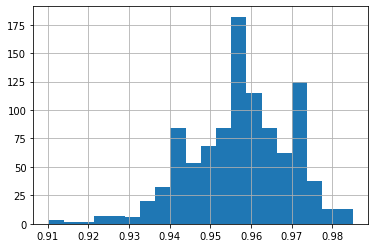

In [56]:
import pandas as pd

s = pd.Series(boots).hist(bins=20)

In [57]:
conf90 = boots[50:-50]
conf90[0], conf90[-1]

(0.937125748502994, 0.9760479041916168)

----

## Feature Engineering Cleanup

### One-Hot-Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder

**Step 1:** fit() on the training data

**Step 2:** transform() the training data

In [77]:
oh = OneHotEncoder(sparse=False, handle_unknown='ignore')    # also an estimator
oh.fit(df[['Species', 'Sex']]) # memorizes all the different categories
onehot_species = oh.transform(df[['Species', 'Sex']])
onehot_species.shape

(334, 6)

In [78]:
oh.categories_  # <-- determined by fit()

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['.', 'FEMALE', 'MALE'], dtype=object)]

**Step 3:** transform() the test data

In [82]:
# now new data is coming in
test_data = pd.DataFrame({'Species': ['Gentoo', 'Gentoo', 'Chinstrap', 'Emperor'],
                          'Sex': ['FEMALE', 'MALE', 'INTERSEX/NON-BINARY', '.']})

In [80]:
oh.transform(test_data[['Species', 'Sex']])

array([[0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

**next step:** make a DF out of it, use pd.concat

**DO NOT CALL fit() ON TEST DATA EVER!**

In [71]:
oh.fit(test_data[['Species']])   # forgets that Adelie
oh.transform(test_data[['Species']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [73]:
oh.categories_  # could be used as column labels

[array(['Chinstrap', 'Emperor', 'Gentoo'], dtype=object)]

## Scaling

**Step 1:** fit() on the training data

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()
scaler.fit(df[['Culmen Length (mm)', 'Body Mass (g)']]) # calculate the min and max for each column
scaler.data_min_, scaler.data_max_

(array([  32.1, 2700. ]), array([  59.6, 6300. ]))

**Step 2:** transform() the training data

In [90]:
Xt = scaler.transform(df[['Culmen Length (mm)', 'Body Mass (g)']])   # Xtrain also works if numerical
Xt.shape

(334, 2)

**Step 3:** transform() the test data

In [93]:
test_data = pd.DataFrame({'Culmen Length (mm)': [40.0, 50.0, 20.0], 'Body Mass (g)': [4500, 10000, 3500]})

In [97]:
scaler.transform(test_data[['Culmen Length (mm)', 'Body Mass (g)']])

array([[ 0.28727273,  0.5       ],
       [ 0.65090909,  2.02777778],
       [-0.44      ,  0.22222222]])